In [9]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats


In [3]:
rFon1D = np.load("cbf1_nn_pred_s1_seq.csv_rFon1D.npy")
rFon1D.shape

(10, 4)

In [4]:
rFon1D

array([[ 2.81563019e-02, -4.01567940e-03, -1.73376290e-02,
        -6.80359658e-03],
       [ 2.48353589e-02, -1.04283164e-02, -1.28647890e-03,
        -1.27701304e-02],
       [ 2.87203417e-02,  1.12569135e-02, -4.98010255e-02,
         1.00118167e-02],
       [-3.66775896e-02,  4.93021161e-02, -7.46535005e-02,
         6.29454863e-02],
       [ 6.88541746e-02,  4.30363794e-02, -1.72163398e-03,
        -1.13050951e-01],
       [-1.04619042e-01, -1.06563642e-02,  7.38885464e-02,
         4.19025234e-02],
       [ 8.79509934e-02, -7.24228479e-02,  5.79010032e-02,
        -7.26307614e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 2.57856573e-02, -2.14133044e-02,  6.55992683e-05,
        -4.35299975e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00]])

In [4]:
rFon1D_flat = list(rFon1D.flatten())
# ### GROUPING THE DATA!
print([i for i in range(1, len(rFon1D_flat), 4)])
np.arange(1, 40)

[1, 5, 9, 13, 17, 21, 25, 29, 33, 37]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])

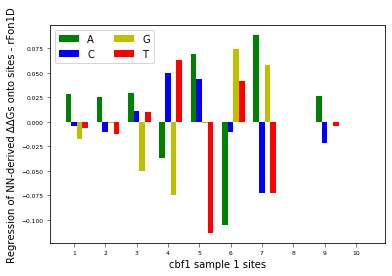

In [8]:
N = 10

ind = np.arange(N)  # x-axis
width = 0.18

# some_dim = [data_array_flat[i], i for i in range(0, 160, 4)]
a_dim = [rFon1D_flat[i] for i in range(0, 40, 4)]  # y-axis for 0 dim
c_dim = [rFon1D_flat[i] for i in range(1, 40, 4)]
g_dim = [rFon1D_flat[i] for i in range(2, 40, 4)]
t_dim = [rFon1D_flat[i] for i in range(3, 40, 4)]

fig, ax = plt.subplots()

p1 = ax.bar(ind, a_dim, width, color='g')
p2 = ax.bar(ind + width, c_dim, width, color='b')
p3 = ax.bar(ind + 2 * width, g_dim, width, color='y')
p4 = ax.bar(ind + 3 * width, t_dim, width, color='r')

ax.set_xticks(ind + width)
ax.set_xticklabels(np.arange(1, 11))

ax.legend((p1[0], p2[0], p3[0], p4[0]), ('A', 'C', 'G', 'T'), loc=2, ncol=2)
ax.tick_params(width = 0.5, labelsize =6) #width of the tick and the size of the tick labels
plt.xlabel('cbf1 sample 1 sites') #Sites 1-5 are left flanking sites and 6-10 are right flanking sites
plt.ylabel("Regression of NN-derived \u0394\u0394Gs onto sites - rFon1D")
#plt.ylabel('Regressions of binding energies onto sites - rFon1D')
#plt.savefig('rFon1D_off_star.png', bbox_inches='tight')
figure = ax.get_figure()    
figure.savefig('cbf1_NN_s1_rFon1D_plot.png', dpi=400)

In [5]:
rFon1D_cbf1_r2_raw = np.load('/Users/saba.nafees/PycharmProjects/TFBS/cbf1/cbf1_r2/updated-firstorder/cbf1_r2_s1.csv_rFon1D.npy')

In [22]:
rFon1D_cbf1_r2_raw

array([[ 0.03458838,  0.00726263, -0.02236145, -0.01990729],
       [ 0.0364262 , -0.00420731, -0.01203193, -0.01983957],
       [ 0.02790849,  0.02058958, -0.04062539, -0.00775519],
       [-0.02927372,  0.06192421, -0.06951   ,  0.03816815],
       [ 0.06862948,  0.05869175, -0.02820233, -0.09679717],
       [-0.07973422,  0.01435832,  0.04902606,  0.01571745],
       [ 0.08220329, -0.04782214,  0.04493711, -0.07822029],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.01971495, -0.01401623, -0.00426506, -0.00153866],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [23]:
r_site1 = np.corrcoef(rFon1D[0], rFon1D_cbf1_r2_raw[0])

In [24]:
slope, intercept, r_site1, p, stderr = scipy.stats.linregress(rFon1D[0], rFon1D_cbf1_r2_raw[0])

In [25]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r_site1:.2f}'
line

'Regression line: y=-0.00+1.27x, r=0.93'

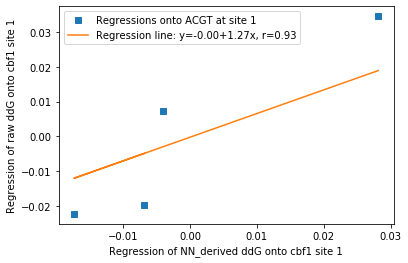

In [35]:
fig, ax = plt.subplots()
ax.plot(rFon1D[0], rFon1D_cbf1_r2_raw[0], linewidth=0, marker='s', label='Regressions onto ACGT at site 1')
ax.plot(rFon1D[0], intercept + slope * rFon1D[0], label=line)
ax.set_xlabel('Regression of NN_derived ddG onto cbf1 site 1')
ax.set_ylabel('Regression of raw ddG onto cbf1 site 1')
ax.legend(facecolor='white')
fig.savefig('cbf1_reg_corr_nn_raw_site1.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
r_site5 = np.corrcoef(rFon1D[4], rFon1D_cbf1_r2_raw[4])
slope, intercept, r_site5, p, stderr = scipy.stats.linregress(rFon1D[4], rFon1D_cbf1_r2_raw[4])
line_site5 = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r_site5:.2f}'
line_site5

'Regression line: y=0.00+0.94x, r=0.97'

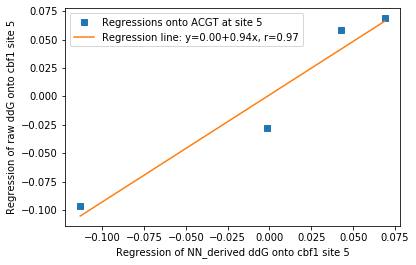

In [37]:
fig, ax = plt.subplots()
ax.plot(rFon1D[4], rFon1D_cbf1_r2_raw[4], linewidth=0, marker='s', label='Regressions onto ACGT at site 5')
ax.plot(rFon1D[4], intercept + slope * rFon1D[4], label=line_site5)
ax.set_xlabel('Regression of NN_derived ddG onto cbf1 site 5')
ax.set_ylabel('Regression of raw ddG onto cbf1 site 5')
ax.legend(facecolor='white')
fig.savefig('cbf1_reg_corr_nn_raw_site5.png', dpi=300, bbox_inches='tight')
plt.show()

In [38]:
r_site6 = np.corrcoef(rFon1D[5], rFon1D_cbf1_r2_raw[5])
slope, intercept, r_site6, p, stderr = scipy.stats.linregress(rFon1D[5], rFon1D_cbf1_r2_raw[5])
line_site6 = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r_site6:.2f}'
line_site6

'Regression line: y=-0.00+0.68x, r=0.96'

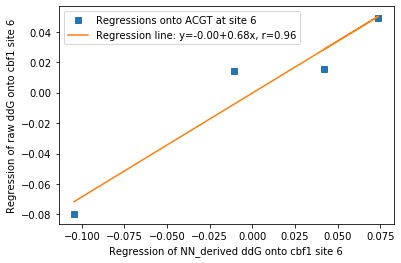

In [39]:
fig, ax = plt.subplots()
ax.plot(rFon1D[5], rFon1D_cbf1_r2_raw[5], linewidth=0, marker='s', label='Regressions onto ACGT at site 6')
ax.plot(rFon1D[5], intercept + slope * rFon1D[5], label=line_site6)
ax.set_xlabel('Regression of NN_derived ddG onto cbf1 site 6')
ax.set_ylabel('Regression of raw ddG onto cbf1 site 6')
ax.legend(facecolor='white')
fig.savefig('cbf1_reg_corr_nn_raw_site6.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
r_site9 = np.corrcoef(rFon1D[8], rFon1D_cbf1_r2_raw[8])
slope, intercept, r_site9, p, stderr = scipy.stats.linregress(rFon1D[8], rFon1D_cbf1_r2_raw[8])
line_site9 = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r_site9:.2f}'
line_site9

'Regression line: y=-0.00+0.71x, r=0.98'

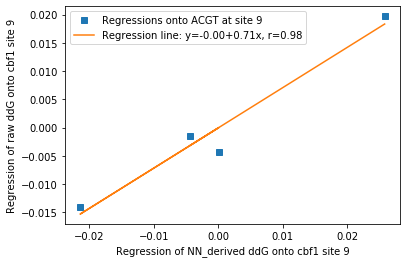

In [41]:
fig, ax = plt.subplots()
ax.plot(rFon1D[8], rFon1D_cbf1_r2_raw[8], linewidth=0, marker='s', label='Regressions onto ACGT at site 9')
ax.plot(rFon1D[8], intercept + slope * rFon1D[8], label=line_site9)
ax.set_xlabel('Regression of NN_derived ddG onto cbf1 site 9')
ax.set_ylabel('Regression of raw ddG onto cbf1 site 9')
ax.legend(facecolor='white')
fig.savefig('cbf1_reg_corr_nn_raw_site9.png', dpi=300, bbox_inches='tight')
plt.show()